Exercise 3 question 8

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import statsmodels.api as sm

%matplotlib inline

/Users/lukwingsan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('/Users/lukwingsan/StatisticalLearning /data/auto.csv') 

In [4]:
df.head() 


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Question 8(a)(i)
Answer: Yes, predictor and response has some relationship between them because null hypothesis is rejected with regression coefficients equal to 0. This is because p-value is close to 0 for the F-statistics.

Question 8(a)(ii)
Answer: Due to the fact that the R-squared value is just about 0.606,  approximately 60% of the variance in mpg is explained by horsepower. 

Question 8(a) (iii)
Answer: Negative relationship exists as the coefficient corresponding to horsepower is equal to -0.1578.

In [9]:

X_train = df['horsepower'] 
y_train = df['mpg']      

In [10]:
X_train.head() 

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [11]:
y_train.head() 

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [12]:
X_train.unique() 

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [13]:

droplist = X_train[X_train == '?'].index 
X_train = X_train.drop(droplist)        
y_train = y_train.drop(droplist)         
X_train.unique()                         

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110', '72',
       '86', '70', '76', '65', '69', '60', '80', '54', '208', '155', '112',
       '92', '145', '137', '158', '167', '94', '107', '230', '49', '75',
       '91', '122', '67', '83', '78', '52', '61', '93', '148', '129', '96',
       '71', '98', '115', '53', '81', '79', '120', '152', '102', '108',
       '68', '58', '149', '89', '63', '48', '66', '139', '103', '125',
       '133', '138', '135', '142', '77', '62', '132', '84', '64', '74',
       '116', '82'], dtype=object)

In [14]:
y_train.unique() 

array([ 18. ,  15. ,  16. ,  17. ,  14. ,  24. ,  22. ,  21. ,  27. ,
        26. ,  25. ,  10. ,  11. ,   9. ,  28. ,  19. ,  12. ,  13. ,
        23. ,  30. ,  31. ,  35. ,  20. ,  29. ,  32. ,  33. ,  17.5,
        15.5,  14.5,  22.5,  24.5,  18.5,  29.5,  26.5,  16.5,  31.5,
        36. ,  25.5,  33.5,  20.5,  30.5,  21.5,  43.1,  36.1,  32.8,
        39.4,  19.9,  19.4,  20.2,  19.2,  25.1,  20.6,  20.8,  18.6,
        18.1,  17.7,  27.5,  27.2,  30.9,  21.1,  23.2,  23.8,  23.9,
        20.3,  21.6,  16.2,  19.8,  22.3,  17.6,  18.2,  16.9,  31.9,
        34.1,  35.7,  27.4,  25.4,  34.2,  34.5,  31.8,  37.3,  28.4,
        28.8,  26.8,  41.5,  38.1,  32.1,  37.2,  26.4,  24.3,  19.1,
        34.3,  29.8,  31.3,  37. ,  32.2,  46.6,  27.9,  40.8,  44.3,
        43.4,  36.4,  44.6,  33.8,  32.7,  23.7,  32.4,  26.6,  25.8,
        23.5,  39.1,  39. ,  35.1,  32.3,  37.7,  34.7,  34.4,  29.9,
        33.7,  32.9,  31.6,  28.1,  30.7,  24.2,  22.4,  34. ,  38. ,  44. ])

In [15]:

d = {'horsepower':X_train.astype('float'), 'mpg':y_train}
df = pd.DataFrame(data=d)
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


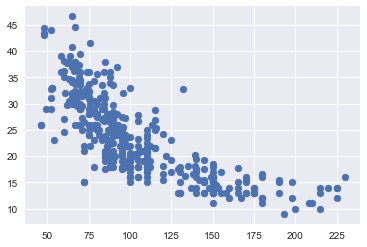

In [16]:

plt.scatter(X_train,y_train);

In [17]:

mod = smf.ols(formula='mpg ~ horsepower', data = df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 20 Feb 2018   Prob (F-statistic):           7.03e-81
Time:                        03:26:32   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Question 8(a)(iv)
Answer: The answer is calculated below. The predicted 'mpg' is equal to 24.46708, with a 95% confidence interval of (23.97308, 24.96108) and a 95% prediction interval of (14.80940, 34.12476). 

In [18]:


from scipy.stats import t
from math import sqrt

def interval(x, y, x0,alpha = .05):
    n = np.size(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    S_xx = np.sum((x-x_bar)**2)         
    S_xy = np.sum((x-x_bar)*(y-y_bar))  
    b = S_xy/S_xx                      
    a = y_bar - b*x_bar                 
    S2 = np.sum((y-a-b*x)**2)/(n-2)    
    S = sqrt(S2)
    ts = t.ppf(1-alpha/2, n-2)
    w_conf = ts*S*sqrt(1/n + (x0-x_bar)**2/S_xx)      
    w_pred = ts*S*sqrt(1 + 1/n + (x0-x_bar)**2/S_xx)  
    print("                fit \t lwr \t  upr")
    print("confidence %3.5f %3.5f %3.5f" % (a+b*x0, a+b*x0 - w_conf, a+b*x0 + w_conf))
    print("prediction %3.5f %3.5f %3.5f" % (a+b*x0, a+b*x0 - w_pred, a+b*x0 + w_pred))

x = df['horsepower']
y = df['mpg']
x0 = 98    
    
interval(x, y, x0)

                fit 	 lwr 	  upr
confidence 24.46708 23.97308 24.96108
prediction 24.46708 14.80940 34.12476


Question 8(b)

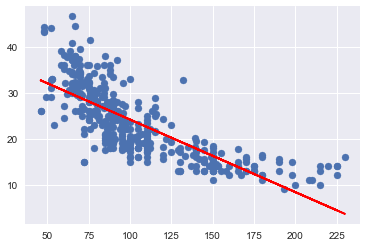

In [19]:
plt.subplots(1,1) 
plt.scatter(X_train.astype('float'), y_train);
plt.plot(X_train.astype('float'), res.fittedvalues, color='red');

Question 8(c)
Answer: The funnel shape of the plotted residuals indicates that we are in the presence of heteroscedasticity.The assumption of homoscedasticity is not held. From the last plot, we can see that no point has much individual influence on the fit with points of Cook's distance well below 1, and higher leverage points concentrate on the upper half of this plot, which indicates a deviation from normality.

In [20]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'mpg ~ horsepower'

df.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=df)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

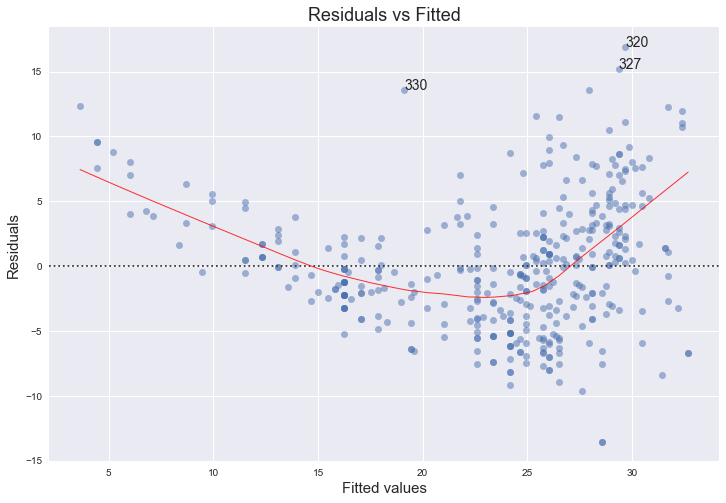

In [21]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=df,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

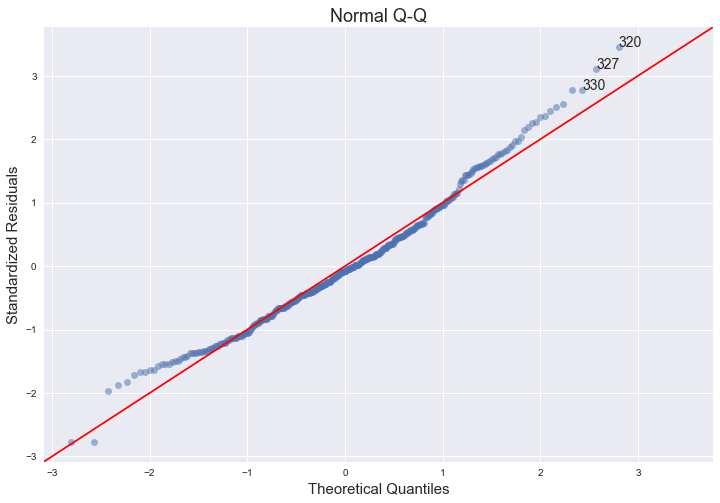

In [22]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');


abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

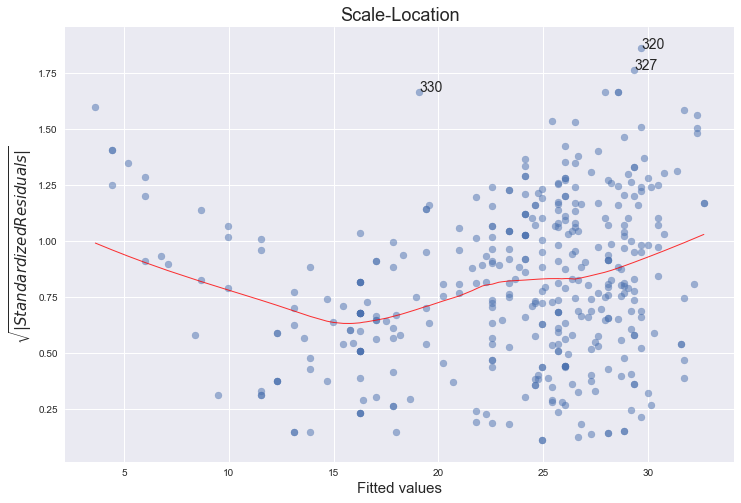

In [23]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

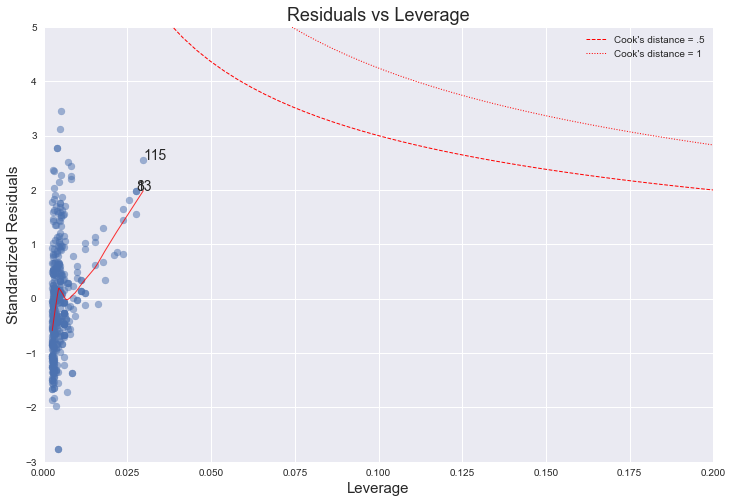

In [24]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')


leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    

def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) 

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') 

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') 

plt.legend(loc='upper right');